In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('df_cleaned')
df.head()

,School,District,Division1,Pupils
0,Aywee Primary School,Abim,1,36
1,Awach P.7 School,Abim,2,52
2,Biyaya Primary School,Abim,4,42
3,Rogom P.7 School,Abim,6,56
4,Oreta P.7 School,Abim,1,48


In [5]:
# summary details of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   School     4400 non-null   object
 1   District   4400 non-null   object
 2   Division1  4400 non-null   object
 3   Pupils     4400 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


All columns are objects ie strings except pupils which is an integer

In [9]:
#how many schools sat exams on that year
len(df['School'])

4400

In [11]:
#how many districts took part
len(df['District'].unique())

149

In [12]:
#total number of division 1
df['Division1'].unique()

array(['1', '2', '4', '6', '21', '5', '36', '43', '3', '8', '9', '13',
       '7', '10', '14', '11', '17', '12', '15', '31', '45', '32', '33',
       '20', '28', '22', '64', '25', '18', 'Buikwe', '24', '35', '42',
       '62', '59', '68', '29', '53', '30', '40', '26', '39', '55', '51',
       '56', '58', '84', '57', '38', '16', '34', 'Butambala', '19', '27',
       '60', '80', '37', 'Hoima', '50', '63', '78', 'Jinja', '23', '44',
       '94', '70', '77', '79', '46', '52', 'Kabarole', 'Kampala', '108',
       '130', '88', '75', '41', '82', '71', '54', '74', '67', '99', '61',
       '132', '125', '201', '83', '98', '233', '134', '124', '123',
       'Kamuli', '73', 'Kasese', 'Kibaale', 'Kisoro', '107', '126',
       'Manafwa', 'Masaka', '161', 'Masindi', '112', 'Mayuge', 'Mbarara',
       '66', '48', '65', '293', '72', 'Mityana', '147', '143', '128',
       '69', '91', 'Rubirizi', '163', 'Tororo', '47', 'Wakiso', '49',
       '127', '102', '90', '100', '142', '111', '81'], dtype=object)

as noticed there are some string values yet its supposed to be integer 
so lets convert them to numeric 

In [16]:
df['Division1'] = pd.to_numeric(df['Division1'],errors='coerce')

Using errors='coerce'. It will replace all non-numeric values with NaN.

In [18]:
df['Division1'].unique()

array([  1.,   2.,   4.,   6.,  21.,   5.,  36.,  43.,   3.,   8.,   9.,
        13.,   7.,  10.,  14.,  11.,  17.,  12.,  15.,  31.,  45.,  32.,
        33.,  20.,  28.,  22.,  64.,  25.,  18.,  nan,  24.,  35.,  42.,
        62.,  59.,  68.,  29.,  53.,  30.,  40.,  26.,  39.,  55.,  51.,
        56.,  58.,  84.,  57.,  38.,  16.,  34.,  19.,  27.,  60.,  80.,
        37.,  50.,  63.,  78.,  23.,  44.,  94.,  70.,  77.,  79.,  46.,
        52., 108., 130.,  88.,  75.,  41.,  82.,  71.,  54.,  74.,  67.,
        99.,  61., 132., 125., 201.,  83.,  98., 233., 134., 124., 123.,
        73., 107., 126., 161., 112.,  66.,  48.,  65., 293.,  72., 147.,
       143., 128.,  69.,  91., 163.,  47.,  49., 127., 102.,  90., 100.,
       142., 111.,  81.])

In [19]:
df['Division1'].sum()

39452.0

In [21]:
#mean average pupils
round(df['Pupils'].mean(),2)

62.34

In [23]:
#district with highest number of division 1
df.groupby('District').sum()['Division1']

District
 Buddo         0.0
 Bugembe       0.0
 Kawanda       0.0
 Kisimu        0.0
 Masindi       0.0
             ...  
Wakiso      6207.0
Yumbe         36.0
Zombo         52.0
kooki          0.0
kyegegwa       2.0
Name: Division1, Length: 149, dtype: float64

In [25]:
df.groupby('District').sum()['Division1'].idxmax() #idxmax = index max

'Wakiso'

In [26]:
#school with highest number of pupils
df[['School','Pupils']].max()

School    wairaka PS
Pupils           602
dtype: object

In [35]:
df[df['Pupils'] == 602]

,School,District,Division1,Pupils
893,Holy Rosary P.7 School,Gulu,10.0,602


In [27]:
#district with highest number of pupils
df[['District','Pupils']].max()

District    kyegegwa
Pupils           602
dtype: object

In [28]:
#dive into kyegegwa
df[df['District'] == 'kyegegwa']

,School,District,Division1,Pupils
2451,Nyabyerima P/S,kyegegwa,1.0,30
2452,Kyaka Parents P/S,kyegegwa,1.0,30


In [32]:
#dataset for schools in abim whose number of pupils is less than 50
df[(df['District'] == 'Abim')& (df['Pupils'] < 50)]

,School,District,Division1,Pupils
0,Aywee Primary School,Abim,1.0,36
2,Biyaya Primary School,Abim,4.0,42
4,Oreta P.7 School,Abim,1.0,48


# VISUALIZATION

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
#count the number of division 1
df['Division1'].value_counts()

1.0      1233
2.0       630
3.0       347
4.0       295
5.0       204
         ... 
111.0       1
161.0       1
49.0        1
163.0       1
54.0        1
Name: Division1, Length: 112, dtype: int64

In [46]:
df.columns

Index(['School', 'District', 'Division1', 'Pupils'], dtype='object')

array([[<AxesSubplot:title={'center':'Division1'}>,
        <AxesSubplot:title={'center':'Pupils'}>]], dtype=object)

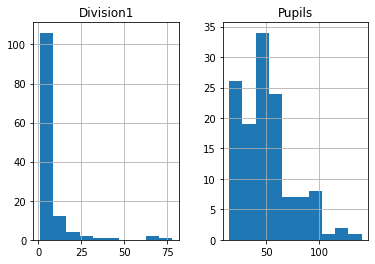

In [56]:
kas = df[df['District'] == 'Kasese']
kas.hist()

<AxesSubplot:>

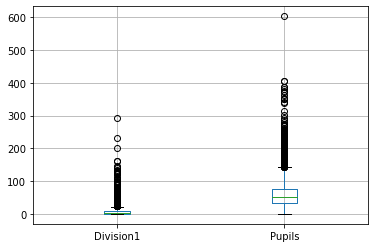

In [59]:
df.boxplot(column = ['Division1','Pupils'])

In [60]:
df.columns

Index(['School', 'District', 'Division1', 'Pupils'], dtype='object')

In [61]:
df[['Division1','Pupils']].corr()

,Division1,Pupils
Division1,1.000000,0.368297
Pupils,0.368297,1.000000


<AxesSubplot:>

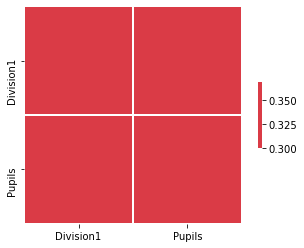

In [63]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Division1','Pupils']].corr(),vmax=.3,
                center=0,cmap=cmap,square=True,linewidths=.5,cbar_kws={"shrink": .3})



<AxesSubplot:>

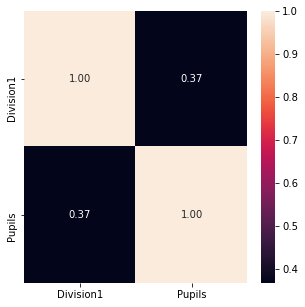

In [64]:
#Visualize the correlation
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot = True, fmt= '.2f')



In [65]:
df_cat = df[['Division1','Pupils']]

graph for Division1: total = 112


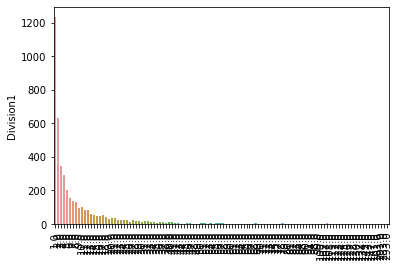

graph for Pupils: total = 251


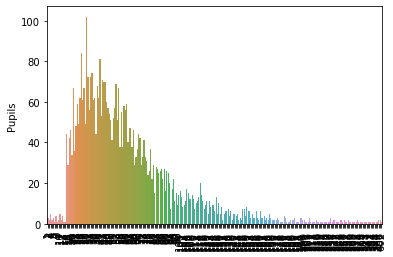

In [71]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i,len(cat_num))) #string formating
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90) #changing labels horizontal
    plt.show()

the instances are many of y axis so you cant visually see the details

In [72]:
pd.pivot_table(df, index = 'Pupils',values = 'Division1')

,Division1
Pupils,
2,1.0
7,1.0
9,10.0
11,18.0
12,7.0
...,...
374,108.0
380,130.0
388,40.0


In [99]:
df[['School','District']].head()

,School,District
0,Aywee Primary School,Abim
1,Awach P.7 School,Abim
2,Biyaya Primary School,Abim
3,Rogom P.7 School,Abim
4,Oreta P.7 School,Abim


In [88]:
#word cloud
import nltk
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

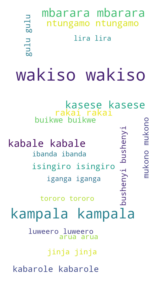

In [102]:
#words = " ".join(kobe_data.text.drop_duplicates())
words = " ".join(df['District'])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text  = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1,  stopwords=STOPWORDS, max_words = 20,width = 800,height = 1500)
wc.generate(text)

plt.figure(figsize=[5,5])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

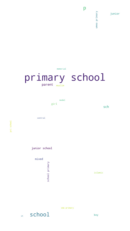

In [104]:
#words = " ".join(kobe_data.text.drop_duplicates())
words = " ".join(df['School'])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text  = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color="white", random_state=1,  stopwords=STOPWORDS, max_words = 20,width = 800,height = 1500)
wc.generate(text)

plt.figure(figsize=[4,4])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()